# Extended Golay code [24,12,8]

#### cool class for working with graphs

In [76]:
'''
IMPORTANT!!!
Strings with #MY_CHANGE were made for stop the algorythm when it detects a clique of n nodes.
'''

'''
Simple class for working with unweighted undirected graphs
@author: Oleksii Kuchaiev; http://www.kuchaev.com
'''
import random
class graph(object):
    '''
    A class for representing and manipulation undirected, unweighted simple graphs without self-loops
    '''
    def __init__(self, userID=None):
        '''
        Constructor
        '''
        if userID==None:
            self.Id=random.randint(0,10000000)
        else:
            self.Id=userID
        self.Nodes=set() #set of nodes
        self.AdjList=dict() #Adjacency list
    def add_node(self,node):
        '''
        Adds node to the graph.
        '''
        if node in self.Nodes:
            raise Exception("Node "+node+" is already present in the graph.")
        else:
            self.Nodes.add(node)
            self.AdjList[node]=set()
    def add_edge(self,nd1,nd2):
        '''
        Adds edge (nd1,nd2) to the graph.
        '''
        if nd1 not in self.Nodes:
            raise Exception("Node "+nd1+" is not present in the graph.")
        if nd2 not in self.Nodes:
            raise Exception("Node "+nd2+" is not present in the graph.")
        if nd1 not in self.AdjList.keys():
            self.AdjList[nd1]=set()
            self.AdjList[nd1].add(nd2)
        else:
            self.AdjList[nd1].add(nd2)
        if nd2 not in self.AdjList.keys():
            self.AdjList[nd2]=set()
            self.AdjList[nd2].add(nd1)
        else:
            self.AdjList[nd2].add(nd1)                
    def readFromEdgeList(self,path):
        '''
        Read graph from the file where it is represented as an edge list.
        The lines of the file should be formated as:
        node1[space]node2[newline] 
        Duplicate edges and self loops are ignored.
        '''
        inp_file=open(path,'r')
        _Nodes=set() # this will replace self.Nodes in case of success
        _AdjList=dict() # this will replace self.AdjList in case of success        
        for line in inp_file:
            nodes=line.split()
            if len(nodes)<2:
                raise Exception("There is an incorrectly formatted line in the edge list file")
            nd1=nodes[0]
            nd2=nodes[1]
            if nd1==nd2:
                continue
            if (nd1 in _Nodes):
                if (nd2 not in _AdjList[nd1]):
                    _AdjList[nd1].add(nd2)
            else:
                _Nodes.add(nd1)
                _AdjList[nd1]=set()
                _AdjList[nd1].add(nd2)
            if (nd2 in _Nodes):
                if (nd1 not in _AdjList[nd2]):
                    _AdjList[nd2].add(nd1)
            else:
                _Nodes.add(nd2)
                _AdjList[nd2]=set()
                _AdjList[nd2].add(nd1)
        inp_file.close()
        self.Nodes.clear()
        self.AdjList.clear()
        self.Nodes=_Nodes
        self.AdjList=_AdjList
    def get_edge_set(self):
        '''
        Returns set of edges in the graph.        
        '''
        Edges=set()
        for nd1 in self.Nodes:
            N=self.get_node_neighbors(nd1)
            for nd2 in N:
                if (nd2,nd1) not in Edges:
                    Edges.add((nd1,nd2))
        return Edges
    def saveAsEdgeList(self,path):
        '''
        Saves graph as edge list
        '''
        out=open(path,'w')
        EdgeList=self.get_edge_set()
        for edge in EdgeList:
            line = edge[0]+" "+edge[1]+"\n"
            out.write(line)
        out.close()             
    def number_of_nodes(self):
        '''
        Returns number of nodes in the graph.
        '''
        return len(self.Nodes)
    def number_of_edges(self):
        '''
        Returns number of edges in the graph.
        '''
        num_edg=0.0;
        for key in self.AdjList.keys():
            num_edg=num_edg+(float(len(self.AdjList[key]))/2)
        return int(num_edg)    
    def degree(self,node):
        '''
        Returns the degree of a node 
        '''
        if node not in self.Nodes:
            raise Exception("There is no node with name: "+str(node)+" in this graph. The id of the graph is: "+str(self.Id))
        return len(self.AdjList[node])
    def get_node_clust_coef(self,node):
        '''
        Returns the clustering coefficient of the node
        '''
        deg=self.degree(node)
        if deg<=1:
            return 0
        Ev=0
        neighbors=self.get_node_neighbors(node)
        for nd in neighbors:
            if self.are_adjacent(node, nd):
                Ev+=1
        cc=float(2*Ev)/(deg*(deg-1))
        return cc        
    def get_node_eccentricity(self,node):
        '''
        Returns the eccentricity of the node.
        Note that this function returns the eccentricity of a node within its
        connected component
        '''
        D=self.BFS(node)
        ec=0
        for key, value in D:
            if value>ec:
                ec=value
        return ec
    def get_node_eccentricity_avg(self,node):
        '''
        Returns the averaged eccentricity of the node. That is, "avg", not "max" distance
        Note that this function returns the eccentricity of a node within its
        connected component
        '''        
        D=self.BFS(node)
        ec=0.0
        counter=0.0
        for key, value in D.items():
            if value>0:
                ec+=value
                counter+=1
        if counter>0:
            return ec/counter
        else:
            return 0
    def get_node_eccentricities_both(self,node):
        '''
        This function is for performance purposes.
        This is function returns standard and averaged eccentricities of the node.
        Note that both eccentricities of the node are within its connected component
        '''
        D=self.BFS(node)
        ec=0
        ecA=0.0
        counter=0.0
        for key, value in D.items():
            if value>0:
                ecA+=value
                counter+=1
                if value>ec:
                    ec=value
        if counter>0:
            return (ec,ecA/counter)
        else:
            return (ec,0)
    def are_adjacent(self,nd1,nd2):
        '''
        Checks if nd1 and nd2 are connected
        '''
        if nd1 not in self.Nodes:
            raise Exception("Node "+str(nd1)+" is not in the graph with id="+str(self.Id))    
        if nd2 not in self.Nodes:
            raise Exception("Node "+str(nd2)+" is not in the graph with id="+str(self.Id))
        if nd2 in self.AdjList[nd1]:
            return True
        else:
            return False
    def get_node_neighbors(self,nd):
        '''
        Returns set of node neighbors
        '''
        #if nd not in self.Nodes:
           # raise Exception("Node "+str(nd)+" is not in the graph with id="+str(self.Id))
        return self.AdjList[nd]
    def BFS(self,source):
        '''
        Implements Breadth-first search from node 'source' in graph 'self'.
        Returns dictionary D {node: distance from source}
        distance=-1 if 'node' is unreachable from 'source'        
        '''
        #if source not in self.Nodes:
         #   raise Exception("Node "+str(source)+" is not in the graph with id="+str(self.Id))        
        D=dict();
        for node in self.Nodes:
            D[node]=-1
        level=0;
        Que0=set()
        Que0.add(source)
        Que1=set()
        while len(Que0)!=0:
            while len(Que0)!=0:
                cur_node=Que0.pop()
                D[cur_node]=level
                N=self.AdjList[cur_node]
                for nd in N:
                    if D[nd]==-1:
                        Que1.add(nd)                        
            level=level+1
            Que0=Que1
            Que1=set()
        return D
    def dist(self,nd1,nd2):
        '''
        Returns shortest-path distance between nd1 and nd2
        '''
        if nd1 not in self.Nodes:
            raise Exception("Node "+str(nd1)+" is not in the graph with id="+str(self.Id))
        if nd2 not in self.Nodes:
            raise Exception("Node "+str(nd2)+" is not in the graph with id="+str(self.Id))
        D=dict();
        for node in self.Nodes:
            D[node]=-1
        level=0;
        Que0=set()
        Que0.add(nd1)
        Que1=set()
        while len(Que0)!=0:
            while len(Que0)!=0:
                cur_node=Que0.pop()
                D[cur_node]=level
                if cur_node==nd2:
                    return level
                N=self.get_node_neighbors(cur_node)
                for nd in N:
                    if D[nd]==-1:
                        Que1.add(nd)
            level=level+1;
            Que0=Que1;
            Que1=set()
        return -1        
    def all_pairs_dist(self):
        '''
        Returns dictionary of all-pairs shortest paths in 'self'
        The dictionary has format {t=(nd1,nd2): distance},
        where t is a tuple.                
        '''
        Distances=dict()
        count=0
        for nd in self.Nodes:
            DD1=self.BFS(nd)
            for key, value in DD1.items():
                t1=nd, key
                t2=key, nd
                Distances[t1]=float(value)
                Distances[t2]=float(value)
        return Distances
    def find_all_cliques(self):
        '''
        Implements Bron-Kerbosch algorithm, Version 2
        '''
        max_clique_len = 0;                                  #MY_CHANGE
        
        Cliques=[]
        Stack=[]
        nd=None
        disc_num=len(self.Nodes)
        search_node=(set(),set(self.Nodes),set(),nd,disc_num) 
        Stack.append(search_node)
        while len(Stack)!=0:
            (c_compsub,c_candidates,c_not,c_nd,c_disc_num)=Stack.pop()
            if len(c_candidates)==0 and len(c_not)==0:
                if len(c_compsub)>2:
                    if(len(c_compsub) > max_clique_len):     #MY_CHANGE
                        max_clique_len = len(c_compsub)      #MY_CHANGE
                    Cliques.append(c_compsub)
                    if(max_clique_len >= 9):                 #MY_CHANGE change n here
                        return Cliques                       #MY_CHANGE
                    continue
            for u in list(c_candidates):
                if (c_nd==None) or (not self.are_adjacent(u, c_nd)):
                    c_candidates.remove(u)
                    Nu=self.get_node_neighbors(u)                                
                    new_compsub=set(c_compsub)
                    new_compsub.add(u)
                    new_candidates=set(c_candidates.intersection(Nu))
                    new_not=set(c_not.intersection(Nu))                    
                    if c_nd!=None:
                        if c_nd in new_not:
                            new_disc_num=c_disc_num-1
                            if new_disc_num>0:
                                new_search_node=(new_compsub,new_candidates,new_not,c_nd,new_disc_num)                        
                                Stack.append(new_search_node)
                        else:
                            new_disc_num=len(self.Nodes)
                            new_nd=c_nd
                            for cand_nd in new_not:
                                cand_disc_num=len(new_candidates)-len(new_candidates.intersection(self.get_node_neighbors(cand_nd))) 
                                if cand_disc_num<new_disc_num:
                                    new_disc_num=cand_disc_num
                                    new_nd=cand_nd
                            new_search_node=(new_compsub,new_candidates,new_not,new_nd,new_disc_num)                        
                            Stack.append(new_search_node)                
                    else:
                        new_search_node=(new_compsub,new_candidates,new_not,c_nd,c_disc_num)
                        Stack.append(new_search_node)
                    c_not.add(u) 
                    new_disc_num=0
                    for x in c_candidates:
                        if not self.are_adjacent(x, u):
                            new_disc_num+=1
                    if new_disc_num<c_disc_num and new_disc_num>0:
                        new1_search_node=(c_compsub,c_candidates,c_not,u,new_disc_num)
                        Stack.append(new1_search_node)
                    else:
                        new1_search_node=(c_compsub,c_candidates,c_not,c_nd,c_disc_num)
                        Stack.append(new1_search_node)     
        return Cliques
    def create_empty_graph(self,n):
        '''
        creates graph with n nodes but without edges
        '''
        G=graph()
        for i in range(1,n+1):
            nd=str(i)
            G.add_node(nd)
        return G  
    def create_path_graph(self,n):
        '''
        Create path-graph on n nodes
        '''
        if n<2:
            raise Exception("Can't create a path graph with less than 2 nodes.")
        G=self.create_empty_graph(n)
        for i in range(1,n):
            nd1=str(i)
            nd2=str(i+1)
            G.add_edge(nd1, nd2)
        return G         
    def create_cycle_graph(self,n):
        '''
        Creates graph-cycle on n nodes.
        Nodes are numbered from 1 to n.
        '''
        if n<3:
            raise Exception("Can't create a cycle with less than 3 nodes.") 
        G=self.create_path_graph(n)
        G.add_edge(str(1), str(n))
        return G
    def create_circulant_graph(self,n,j):
        '''
        Creates a circulant graph with n nodes and m edges.
        Nodes are numbered from 1 to n.
        The chords are defined by parameters j.
        That is node i is connected to (i-j) mod n and (i+j) mod n.
        Note that not always the exact match in terms of edges is possible!
        Check the output graph for the number of edges!
        '''
        G=self.create_cycle_graph(n) # node numbers starts from 1         
        for i in range(0,n):
            ndi=str(i % n + 1)
            nd2 = str(( i - j ) % n + 1)
            nd3 = str(( i + j ) % n + 1)
            G.add_edge(ndi, nd2)
            G.add_edge(ndi, nd3)                         
        return G    
    def create_complete_graph(self,n):
        '''
        creates complete graph on n nodes
        '''
        G=self.create_empty_graph(n)
        L=list(G.Nodes)
        for i in range(0,len(L)):
            for j in range(i+1,len(L)):
                G.add_edge(L[i], L[j])
        return G 

In [124]:
import numpy as np
import matplotlib.pyplot as plt

### generating a corrective matrixes

In [125]:
def get_G_H_matrixes():
    # returns G and H matrixes in a tuple
    
    A = np.eye(12, dtype=np.int);
    B = np.array([[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
                  [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0],
                  [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
                  [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
                  [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
                  [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], 
                  [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
                  [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
                  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
                  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]], dtype=np.int);
    G = np.concatenate((A, B), axis=1);
    H = np.concatenate((B, A), axis=0);
    return (G, H);

In [168]:
(G, H) = get_G_H_matrixes();

print(G)
print()
print(H)

[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1]]

[[1 0 0 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 1 1 1 1 1 0 1 0]
 [0 0 1 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 1 0]
 [1 1 0 0 1 0 0 1 1 1 0 1]
 [1 1 1 0 0 1 0 0 1 1 1 0]
 [1 1 1 1 0 0 1 0 0 1 0 1]
 [1 1 1 1 1 0 0 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 1 1 1 1 1 0 0 1 1 0]
 [0 1 0 1 0 1 0 1 0 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 

### some functions for working with binary codewords

In [127]:
def bin_sum(a, b):
    n = max(a.shape[0], b.shape[0]);
    c = a+b;
    for i in np.arange(n-1, 0, -1):
        if(c[i]==2):
            c[i]=0;
            c[i-1]+=1;
        if(c[i]==3):
            c[i]=1;
            c[i-1]+=1;
    return c;

In [128]:
def bin_multipl(A, B):
    shape_a = A.shape;
    shape_b = B.shape;
    C = np.ndarray(shape = (shape_a[0], shape_b[1]), dtype=np.int);
    
    if(shape_a[1]!=shape_b[0]):
        return 0;
    
    for i in np.arange(0, shape_a[0], 1):
        for j in np.arange(0, shape_b[1], 1):
            C[i][j] = 0;
            for k in np.arange(0, shape_a[1], 1):
                C[i][j] += A[i][k]*B[k][j];
            C[i][j] = C[i][j] % 2;
    return C;

In [129]:
def bin_weight(a):
    weight = 0;
    for i in np.arange(0, a.shape[0], 1):
        if (a[i] == 1):
              weight += 1;
    return weight;

In [130]:
def hamming_dist(a, b):
    dist = 0;
    for i in np.arange(0, a.shape[0], 1):
        if(a[i] != b[i]):
            dist += 1;
    return dist;

In [131]:
def get_bin_nums_matrix():
    # matrix of all possible binary words with length 12
    bin_one = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=np.int);
    
    B = np.ndarray(shape=(4096, 12), dtype=np.int);
    B[0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0];
    for i in np.arange(0, 4095, 1):
        next = bin_sum(B[i], bin_one);
        B[i+1] = next;
    return B;

In [132]:
bin_nums = get_bin_nums_matrix();

print(bin_nums);

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]
 ..., 
 [1 1 1 ..., 1 0 1]
 [1 1 1 ..., 1 1 0]
 [1 1 1 ..., 1 1 1]]


## Getting all codewords of Golay's code

In [133]:
def get_codewords(Din, G):
    Code_words = np.ndarray(shape = (Din.shape[0], 24), dtype=np.int);
    Code_words = bin_multipl(Din, G);
    return Code_words;

In [134]:
all_code_words = get_codewords(bin_nums, G);

print(all_code_words);

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 1 0 0]
 [1 1 1 ..., 1 1 1]]


### calculating a statistic on words with the same weights

In [135]:
weight = np.zeros(4096)
hst = np.zeros(25, dtype=np.int)
print (hst)
#arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
for i in range(0, 4096):
    weight[i] = bin_weight(all_code_words[i]);
print (weight)

for i in range(0, 4096):
    for j in range (0, 25):
        if weight[i] == j:
            hst[j] += 1

#plt.hist(weight)
#plt.show(weight)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0.   8.   8. ...,  16.  16.  24.]


In [136]:
print (hst)

[   1    0    0    0    0    0    0    0  759    0    0    0 2576    0    0
    0  759    0    0    0    0    0    0    0    1]


In [137]:
print(weight);            

[  0.   8.   8. ...,  16.  16.  24.]


### Choosing all codewords with weight 8

In [138]:
def get_words_of_weight_eight(codewords):
    codewords_w_eight = np.ndarray(shape=(759,24), dtype=np.int);
    j = 0;
    for i in np.arange(0, codewords.shape[0], 1):
        if(bin_weight(codewords[i]) == 8):
            codewords_w_eight[j] = codewords[i];
            j += 1;
    return codewords_w_eight;

In [139]:
codewords_w_eight = get_words_of_weight_eight(all_code_words);

print(codewords_w_eight);

file = open("codewords_w_eight", "w");
for i in np.arange(0, codewords_w_eight.shape[0], 1):
    line = "";
    for j in np.arange(0, codewords_w_eight.shape[1]-1, 1):
        line += str(int(codewords_w_eight[i][j]))+", "
    line += str(int(codewords_w_eight[i][codewords_w_eight.shape[1]-1]))+"\n";
    file.write(line);
file.close();

[[0 0 0 ..., 0 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 1 1 0]
 [1 1 1 ..., 0 0 0]]


### Creating a list with all edges in graph 
edge between node "1" and "2" means that the Hamming distance between codewords "1" and "2" is not less than 12

In [141]:
file = open("edge_list.txt", "w");

for i in np.arange(0, codewords_w_eight.shape[0]-1, 1):
    for j in np.arange(i+1, codewords_w_eight.shape[0], 1):
        if(hamming_dist(codewords_w_eight[i], codewords_w_eight[j]) >= 12):
            line = str(i)+" "+str(j)+"\n";
            file.write(line);
file.close();

### Creating connectivity matrix and connectivity list of the graph

In [142]:
def get_connectivity_matrix(codewords):
    connectivity_matrix = np.zeros((codewords.shape[0], codewords.shape[0]), dtype=np.int);
    for i in np.arange(0, codewords.shape[0], 1):
        for j in np.arange(0, codewords.shape[0], 1):
            if((hamming_dist(codewords[i], codewords[j]) >= 12) or (hamming_dist(codewords[i], codewords[j]) == 0)):
                connectivity_matrix[i][j] = 1;
    return connectivity_matrix;

In [143]:
connectivity_matrix = get_connectivity_matrix(codewords_w_eight);

print(connectivity_matrix);

[[1 1 0 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 [0 0 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 0 0]
 [1 1 1 ..., 0 1 0]
 [1 1 1 ..., 0 0 1]]


In [144]:
def get_connectivity_list(codewords):
    connectivity_list = list([]);
    
    for i in np.arange(0, codewords.shape[0], 1):
        line = list([]);
        for j in np.arange(0, codewords.shape[0], 1):
            if(hamming_dist(codewords[i], codewords[j]) >= 12):
                line.append(j);
        connectivity_list.append(line);
    return connectivity_list;

In [145]:
connectivity_list = get_connectivity_list(codewords_w_eight);

print(connectivity_list[0:2]);

[[1, 12, 17, 22, 23, 24, 31, 34, 39, 40, 41, 44, 51, 54, 57, 62, 63, 64, 67, 72, 73, 74, 75, 76, 77, 82, 85, 92, 95, 96, 97, 100, 101, 102, 103, 104, 105, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 126, 127, 128, 129, 136, 137, 140, 141, 144, 145, 146, 147, 148, 153, 156, 157, 158, 161, 162, 163, 166, 167, 170, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 185, 186, 189, 192, 193, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 216, 217, 220, 221, 222, 229, 230, 233, 234, 237, 240, 241, 242, 245, 248, 249, 250, 253, 254, 255, 256, 257, 258, 259, 260, 261, 264, 265, 266, 269, 270, 271, 272, 273, 274, 275, 276, 279, 280, 283, 284, 285, 286, 287, 288, 289, 292, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 334, 339, 340, 341, 344, 349, 350, 355, 356, 357, 358, 359, 360, 361, 362, 365, 366, 367, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 384, 387, 388, 

### Visualisation of connectivity matrix

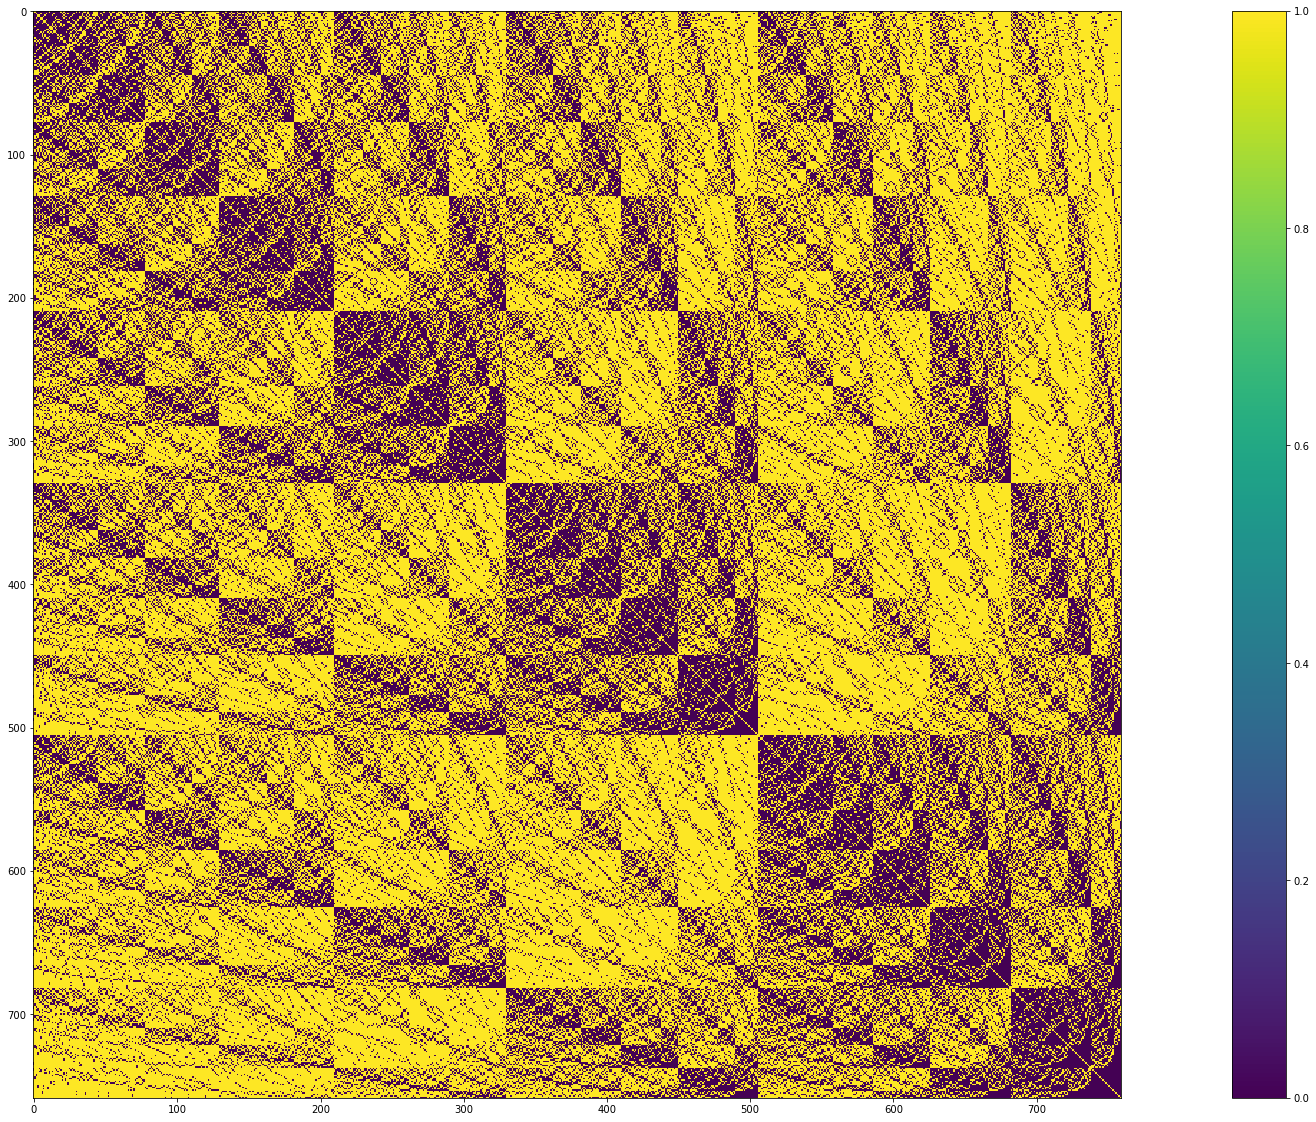

In [171]:
# just good pic
plt.figure(figsize=(40,20))

plt.imshow(connectivity_matrix)

plt.colorbar()

plt.show()


## Search cliques in the graph of codewords of length 8 with a minimum distance of 12

In [147]:
Big_graph = graph()
Big_graph.readFromEdgeList("edge_list.txt");

In [148]:
def find_Cliques(iteration_num):
    Cliques = Big_graph.find_all_cliques();

    file = open("Cliques_"+str(iteration_num), "w");
    file.write(str(Cliques));
    file.close();
     
    print(Cliques);

In [149]:
find_Cliques(5)

[{'180', '337', '645', '473', '616', '91'}, {'540', '337', '181', '202', '237', '685', '91'}, {'540', '181', '202', '237', '524', '685', '482'}, {'540', '337', '181', '202', '237', '685', '482'}, {'540', '181', '202', '237', '524', '685', '270'}, {'337', '181', '645', '237', '616', '91'}, {'722', '645', '237', '473', '616', '33', '91'}, {'207', '722', '645', '237', '473', '33', '91'}, {'207', '713', '722', '645', '237', '33', '91'}, {'40', '181', '713', '722', '645', '237', '91'}, {'40', '181', '202', '713', '645', '237', '91'}, {'540', '40', '181', '202', '237', '685', '482'}, {'166', '237', '473', '616', '654', '33', '91'}, {'40', '648', '166', '237', '616', '91'}, {'372', '166', '237', '616', '654', '33', '91'}, {'540', '181', '445', '524', '320', '685'}, {'445', '473', '524', '65', '320', '95'}, {'207', '445', '237', '473', '65', '685', '654'}, {'207', '722', '445', '645', '237', '473', '33'}, {'207', '722', '445', '645', '237', '473', '524'}, {'540', '181', '722', '445', '237', '5

In [74]:
#{'758', '121', '696', '404', '237', '130', '40', '648', '133'}

In [169]:
clique_of_9_words = np.ndarray(shape = (9,24), dtype=np.int);
nums = [758, 121, 696, 404, 237, 130, 40, 648, 133];

file = open("clique_of_9_words.txt", "w");
j=0;
for i in nums:
    file.write(str(codewords_w_eight[i])+"\n");
    clique_of_9_words[j] = codewords_w_eight[i];
    j +=1;
file.close();

In [170]:
print(clique_of_9_words)

[[1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1]
 [1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0]]


# Yep! We found it :)